# King County Dataset Linear Regression Model 4

### In this model I am going to try the same only without 'grade' and 'sqft_above' since they seem to be multicollinier

In [25]:
import pandas as pd
data = pd.read_csv("kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [27]:
data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [28]:
data.waterfront.fillna(value=data.waterfront.median(), inplace = True)
data.view.fillna(value=data.view.median(), inplace = True)
data.yr_renovated.fillna(value=data.yr_renovated.median(), inplace = True)

In [29]:
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [30]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [32]:
# first, create bins for based on the values observed. 4 values will result in 3 bins
bins = [0, 1900,  2000, 2020]
bins_yr_renovated = pd.cut(data['yr_renovated'], bins)
#bins_yr_renovated = bins_yr_renovated.as_unordered()


yr_renovated_dummy = pd.get_dummies(bins_yr_renovated, prefix="yr-ren", drop_first=True)
data = data.drop(["yr_renovated"], axis=1)
data = pd.concat([data, yr_renovated_dummy], axis=1)

In [33]:
# Trying it without grade and sqft above.
X = data.drop(["date","sqft_basement", "grade", "sqft_above"], axis=1)
y = pd.DataFrame(data, columns = ['price'])

In [34]:
# Perform a train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
# A brief preview of our train test split
print(len(X_train), len(X_test), len(y_train), len(y_test))

16197 5400 16197 5400


In [35]:
# Apply your model to the train set
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
# Calculate predictions on training and test sets
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

# Calculate training and test residuals
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [37]:
#Calculate the Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 4.644523857185291e-19
Test Mean Squarred Error: 4.2158915995624026e-19


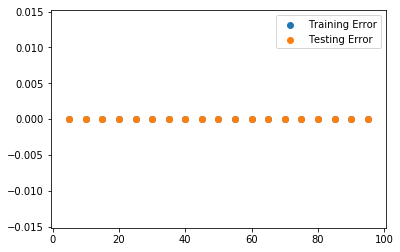

In [38]:
#Evaluate the effect of train-test split 
import random
random.seed(8)
train_err = []
test_err = []
t_sizes = list(range(5,100,5))
for t_size in t_sizes:
    temp_train_err = []
    temp_test_err = []
    for i in range(100):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size/100)
        linreg.fit(X_train, y_train)
        y_hat_train = linreg.predict(X_train)
        y_hat_test = linreg.predict(X_test)
        temp_train_err.append(mean_squared_error(y_train, y_hat_train))
        temp_test_err.append(mean_squared_error(y_test, y_hat_test))
    train_err.append(np.mean(temp_train_err))
    test_err.append(np.mean(temp_test_err))
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend()

In [39]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results  = np.mean(cross_val_score(linreg, X, y, cv=5,  scoring='neg_mean_squared_error'))
cv_5_results

-1.2294461659138716e-19

In [42]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = "price ~ id+bedrooms+bathrooms+sqft_living+sqft_lot+floors+yr_renovated_dummy+view+waterfront+yr_built+zipcode+lat+long+sqft_living15+sqft_lot15"

model = ols(formula= formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     2723.
Date:                Fri, 11 Oct 2019   Prob (F-statistic):               0.00
Time:                        10:12:34   Log-Likelihood:            -2.9546e+05
No. Observations:               21597   AIC:                         5.910e+05
Df Residuals:                   21580   BIC:                         5.911e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              6.384e+06   3.01e+06      2.118      0.034    4.76e+05    1.23e+07
id                    -1.026e-06   5.07e-07     -2.022      0.043   -2.02e-06   -3.16e-08
bedrooms               -4.74e+04   1977.704    -23.966      0.000   -5.13e+04   -4.35e+04
bathrooms              4.854e+04   3372.818     14.391      0.000    4.19e+04    5.52e+04
sqft_living             227.9124      3.270     69.699      0.000     221.503     234.322
sqft_lot                  0.1813      0.050      3.599      0.000       0.083       0.280
floors                 4.125e+04   3324.263     12.409      0.000    3.47e+04    4.78e+04
yr_renovated_dummy[0] -1.646e+04   1.11e+04     -1.488      0.137   -3.81e+04    5216.787
yr_renovated_dummy[1]  1.115e+05   1.16e+04      9.580      0.000    8.87e+04    1.34e+05
view                    5.79e+04   2197.934     26.345      0.000    5.36e+04    6.22e+04
waterfront             6.163e+05   1.91e+04     32.330      0.000    5.79e+05    6.54e+05
yr_built              -2168.4079     69.815    -31.059      0.000   -2305.251   -2031.565
zipcode                -693.4252     34.428    -20.141      0.000    -760.906    -625.944
lat                    6.605e+05   1.11e+04     59.650      0.000    6.39e+05    6.82e+05
long                  -2.814e+05   1.35e+04    -20.833      0.000   -3.08e+05   -2.55e+05
sqft_living15            73.5564      3.404     21.607      0.000      66.884      80.229
sqft_lot15               -0.4539      0.077     -5.876      0.000      -0.605      -0.302
==============================================================================
Omnibus:                    16509.131   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1147823.771
Skew:                           3.106   Prob(JB):                         0.00
Kurtosis:                      38.170   Cond. No.                     1.13e+13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Results

R-squared is 0.669. Something happened binning the yr_renovated, especially trying to drop one bin - the P value looks off.